# Projet Fraude

Fraude sur le e-commerce 
jointure à faire 
Target class : 1 = fraud |  0 = ok  

Def X et Y 
spliter
Traiter les variables catégoriques -> encodage 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import warnings
warnings.simplefilter('ignore')
#autres

In [2]:
df1 = pd.read_csv('../content/Fraud_Data.csv',parse_dates=['signup_time', 'purchase_time'])

In [3]:
df1.head()

user_id         signup_time       purchase_time  ...  age    ip_address class
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11  ...   39  7.327584e+08     0
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54  ...   53  3.503114e+08     0
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45  ...   53  2.621474e+09     1
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50  ...   41  3.840542e+09     0
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53  ...   45  4.155831e+08     0

[5 rows x 11 columns]

In [5]:
df2 = pd.read_csv('../content/IpAddress_to_Country.csv');

In [6]:
df2.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
df1=df1[df1['class'].notna()]
df1

user_id          signup_time  ...    ip_address  class
0         22058  2015-02-24 22:55:49  ...  7.327584e+08      0
1        333320  2015-06-07 20:39:50  ...  3.503114e+08      0
2          1359  2015-01-01 18:52:44  ...  2.621474e+09      1
3        150084  2015-04-28 21:13:25  ...  3.840542e+09      0
4        221365  2015-07-21 07:09:52  ...  4.155831e+08      0
...         ...                  ...  ...           ...    ...
151107   345170  2015-01-27 03:03:34  ...  3.451155e+09      1
151108   274471  2015-05-15 17:43:29  ...  2.439047e+09      0
151109   368416  2015-03-03 23:07:31  ...  2.748471e+09      0
151110   207709  2015-07-09 20:06:07  ...  3.601175e+09      0
151111   138208  2015-06-10 07:02:20  ...  4.103825e+09      0

[151112 rows x 11 columns]

Créer une nouvelle colonne country en effectuant une jointure entre les deux dataset

il faut que l'addresse ip de df1  soit entre les valeurs low et upper du tableau 2 pour def la country 

In [ ]:
g= df2.groupby('lower_bound_ip_address');
h= df2.groupby('upper_bound_ip_address');
l= df2.groupby('country');

df1['country']=0;

for (i,x) in df1.iterrows():
  if i in df1.ip_address in range(g.groups.keys, h.groups.keys):
    df1.loc[i,'country'] = l.get_group(x.country)

df1
#ne pas utiliser des iterrow si on doit pas calculer quelque chose 
#on doit faire des masques voir la correction 

TypeError: ignored

Correction

In [7]:
countries = []

for i in range (len(df1)):
  #pointeur
  ip_address=df1.loc[i,'ip_address']
  #comparaison encore le pointeur et la plus petite address et la plus grande, on créer un datatable par comparaison
  tmp = df2[(df2['lower_bound_ip_address']<= ip_address) &
              (df2['upper_bound_ip_address'] >= ip_address)]
  #si on trouve une valeur            
  if len(tmp)==1:
    #on met le nom du pays dans la valeur 
    countries.append(tmp['country'].values[0])
  #on met NA quand on sait pas quel est le pays
  else: 
    countries.append('NA')

df1['country']=countries
df1.head()

user_id         signup_time  ... class        country
0    22058 2015-02-24 22:55:49  ...     0          Japan
1   333320 2015-06-07 20:39:50  ...     0  United States
2     1359 2015-01-01 18:52:44  ...     1  United States
3   150084 2015-04-28 21:13:25  ...     0             NA
4   221365 2015-07-21 07:09:52  ...     0  United States

[5 rows x 12 columns]

est-ce que les fraudes sont localisé dans un pays en particulier ?

Créer une nouvelle variable time_diff qui sera la différence entre les variables purchase_time et signup_time

In [ ]:
pd.to_datetime(df1.purchase_time)

0        2015-04-18 02:47:11
1        2015-06-08 01:38:54
2        2015-01-01 18:52:45
3        2015-05-04 13:54:50
4        2015-09-09 18:40:53
                 ...        
151107   2015-03-29 00:30:47
151108   2015-05-26 12:24:39
151109   2015-05-20 07:07:47
151110   2015-09-07 09:34:46
151111   2015-07-21 02:03:53
Name: purchase_time, Length: 151112, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df1.signup_time)

0        2015-02-24 22:55:49
1        2015-06-07 20:39:50
2        2015-01-01 18:52:44
3        2015-04-28 21:13:25
4        2015-07-21 07:09:52
                 ...        
151107   2015-01-27 03:03:34
151108   2015-05-15 17:43:29
151109   2015-03-03 23:07:31
151110   2015-07-09 20:06:07
151111   2015-06-10 07:02:20
Name: signup_time, Length: 151112, dtype: datetime64[ns]

In [ ]:
df1['time_diff']=0

for i in range(len(df1)):
  #abd = valeur absolue 
  df1.loc[i,"time_diff"] = abs(pd.to_datetime(df1.loc[i,"purchase_time"]) - pd.to_datetime(df1.loc[i,"signup_time"])).total_seconds()
df1.head()

user_id          signup_time  ... device_num  time_diff
0    22058  2015-02-24 22:55:49  ...          1    4506682
1   333320  2015-06-07 20:39:50  ...          1      17944
2     1359  2015-01-01 18:52:44  ...         12          1
3   150084  2015-04-28 21:13:25  ...          1     492085
4   221365  2015-07-21 07:09:52  ...          1    4361461

[5 rows x 14 columns]

Correction prof

In [8]:
#on gagne beaucoup de temps car on fait pas d'itération
time_diff = df1['purchase_time'] - df1['signup_time'] # opération sur deux series
time_diff = time_diff.apply(lambda x: x.total_seconds()) #fonction lamda plus rapide
df1['time_diff'] = time_diff
time_diff

0         4506682.0
1           17944.0
2               1.0
3          492085.0
4         4361461.0
            ...    
151107    5261233.0
151108     931270.0
151109    6681616.0
151110    5146119.0
151111    3524493.0
Length: 151112, dtype: float64

In [9]:
df1

user_id         signup_time  ...        country  time_diff
0         22058 2015-02-24 22:55:49  ...          Japan  4506682.0
1        333320 2015-06-07 20:39:50  ...  United States    17944.0
2          1359 2015-01-01 18:52:44  ...  United States        1.0
3        150084 2015-04-28 21:13:25  ...             NA   492085.0
4        221365 2015-07-21 07:09:52  ...  United States  4361461.0
...         ...                 ...  ...            ...        ...
151107   345170 2015-01-27 03:03:34  ...  United States  5261233.0
151108   274471 2015-05-15 17:43:29  ...    Netherlands   931270.0
151109   368416 2015-03-03 23:07:31  ...          Japan  6681616.0
151110   207709 2015-07-09 20:06:07  ...  United States  5146119.0
151111   138208 2015-06-10 07:02:20  ...             NA  3524493.0

[151112 rows x 13 columns]

Est-ce qu'il y a un rapport entre le temps d'inscription et le premier achat pour les fraudes

Regroupper les user_id par device_id afin d'avoir le nombre de device par client : Est-ce que le nombre de device qui utilise la même ip plus il peut etre un fraudeur

on chercher le nombre de device par utilisateur

In [ ]:
#g= df1.groupby('device_id');

#df1['device_num']=0;

#for (i,x) in df1.iterrows():
  #if i in df1.index and x.device_id in g.groups.keys:
  #  df1.loc[i,'device_num'] = g.get_group(x.device_id).count()

#df1

Correction

In [ ]:
g= df1.groupby('device_id').count().reset_index();
g

device_id  user_id  signup_time  ...  country  device_num  time_diff
0       AAALBGNHHVMKG        1            1  ...        1           1          1
1       AAAWIHVCQELTP        1            1  ...        1           1          1
2       AAAXJHWCLISKY        1            1  ...        1           1          1
3       AAAXXOZJRZRAO       11           11  ...       11          11         11
4       AABFGRPBQHWFQ        1            1  ...        1           1          1
...               ...      ...          ...  ...      ...         ...        ...
137951  ZZZGSIJRNCXBJ        1            1  ...        1           1          1
137952  ZZZIKLJSVSQMF        1            1  ...        1           1          1
137953  ZZZKJIZHJEDFN        1            1  ...        1           1          1
137954  ZZZMVOGBAJVTM        1            1  ...        1           1          1
137955  ZZZXASJUVUNMV        1            1  ...        1           1          1

[137956 rows x 14 columns]

In [10]:
device_num = df1[['user_id', 'device_id']].groupby('device_id').count().reset_index() #recalcule les indexs car sans il n'y a plus d'indexs
device_num = device_num.rename(columns={'user_id': 'device_num'})
df1 = df1.merge(device_num, how='left', on='device_id')
df1

user_id         signup_time  ...  time_diff  device_num
0         22058 2015-02-24 22:55:49  ...  4506682.0           1
1        333320 2015-06-07 20:39:50  ...    17944.0           1
2          1359 2015-01-01 18:52:44  ...        1.0          12
3        150084 2015-04-28 21:13:25  ...   492085.0           1
4        221365 2015-07-21 07:09:52  ...  4361461.0           1
...         ...                 ...  ...        ...         ...
151107   345170 2015-01-27 03:03:34  ...  5261233.0           2
151108   274471 2015-05-15 17:43:29  ...   931270.0           1
151109   368416 2015-03-03 23:07:31  ...  6681616.0           1
151110   207709 2015-07-09 20:06:07  ...  5146119.0           2
151111   138208 2015-06-10 07:02:20  ...  3524493.0           1

[151112 rows x 14 columns]

Adresse Ip 

In [11]:
ip_num = df1[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_num = ip_num.rename(columns={'user_id': 'ip_num'})
df1 = df1.merge(ip_num, how='left', on='ip_address')
df1

user_id         signup_time  ... device_num  ip_num
0         22058 2015-02-24 22:55:49  ...          1       1
1        333320 2015-06-07 20:39:50  ...          1       1
2          1359 2015-01-01 18:52:44  ...         12      12
3        150084 2015-04-28 21:13:25  ...          1       1
4        221365 2015-07-21 07:09:52  ...          1       1
...         ...                 ...  ...        ...     ...
151107   345170 2015-01-27 03:03:34  ...          2       1
151108   274471 2015-05-15 17:43:29  ...          1       1
151109   368416 2015-03-03 23:07:31  ...          1       1
151110   207709 2015-07-09 20:06:07  ...          2       1
151111   138208 2015-06-10 07:02:20  ...          1       1

[151112 rows x 15 columns]

Traiter les variables signup_time & purchase_time afin de les différentier suivant la semaine et le week end
Singup day and week 

In [12]:
# Signup day and week
df1['signup_day'] = df1['signup_time'].apply(lambda x: x.dayofweek)
df1['signup_week'] = df1['signup_time'].apply(lambda x: x.week)
# Purchase day and week
df1['purchase_day'] = df1['purchase_time'].apply(lambda x: x.dayofweek)
df1['purchase_week'] = df1['purchase_time'].apply(lambda x: x.week)

In [13]:
# Define features and target to be used
columns = ['signup_day', 'signup_week', 'purchase_day', 'purchase_week', 'purchase_value', 'source', 
           'browser', 'sex', 'age', 'country', 'time_diff', 'device_num', 'ip_num', 'class']
df1 = df1[columns]
df1.head()

signup_day  signup_week  purchase_day  ...  device_num  ip_num class
0           1            9             5  ...           1       1     0
1           6           23             0  ...           1       1     0
2           3            1             3  ...          12      12     1
3           1           18             0  ...           1       1     0
4           1           30             2  ...           1       1     0

[5 rows x 14 columns]

## Traiter les variables catégoriques - Encodage 
Le but est de remplacer les valeurs objects/catégorique pour plus de traitement 
On va traiter la colonne : source, browser, country (en chiffre du coup, il faut écraser les données object avec les données chiffres )

In [14]:
from sklearn.preprocessing import LabelEncoder

X= df1["source"]
label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform(" ".join(X).split(" "))
X_labels

array([2, 0, 2, ..., 2, 2, 1])

In [15]:
X

0            SEO
1            Ads
2            SEO
3            SEO
4            Ads
           ...  
151107       SEO
151108       SEO
151109       SEO
151110       SEO
151111    Direct
Name: source, Length: 151112, dtype: object

In [16]:
df1["source"] = X_labels

In [17]:
df1["source"] 

0         2
1         0
2         2
3         2
4         0
         ..
151107    2
151108    2
151109    2
151110    2
151111    1
Name: source, Length: 151112, dtype: int64

In [18]:
Y = df1["browser"]
label_encoder = LabelEncoder()
Y_labels = label_encoder.fit_transform(" ".join(Y).split(" "))
Y_labels

array([0, 0, 3, ..., 2, 0, 2])

In [19]:
df1["browser"] = Y_labels

In [20]:
df1["browser"] 

0         0
1         0
2         3
3         4
4         4
         ..
151107    0
151108    4
151109    2
151110    0
151111    2
Name: browser, Length: 151112, dtype: int64

In [21]:
df1

signup_day  signup_week  purchase_day  ...  device_num  ip_num  class
0                1            9             5  ...           1       1      0
1                6           23             0  ...           1       1      0
2                3            1             3  ...          12      12      1
3                1           18             0  ...           1       1      0
4                1           30             2  ...           1       1      0
...            ...          ...           ...  ...         ...     ...    ...
151107           1            5             6  ...           2       1      1
151108           4           20             1  ...           1       1      0
151109           1           10             2  ...           1       1      0
151110           3           28             0  ...           2       1      0
151111           2           24             1  ...           1       1      0

[151112 rows x 14 columns]

In [22]:
from sklearn.preprocessing import LabelEncoder
X = df1[columns[:-1]]
y = df1['class']
sex_labelEncoder = LabelEncoder()
country_labelEncoder = LabelEncoder()

X['sex'] = sex_labelEncoder.fit_transform(df1['sex']) #ne fonctionne pas
X['country'] = country_labelEncoder.fit_transform(df1['country']) #ne fonctionne pas

df1["sex"] = X['sex']
df1["country"] = X['country']

In [23]:
df1

signup_day  signup_week  purchase_day  ...  device_num  ip_num  class
0                1            9             5  ...           1       1      0
1                6           23             0  ...           1       1      0
2                3            1             3  ...          12      12      1
3                1           18             0  ...           1       1      0
4                1           30             2  ...           1       1      0
...            ...          ...           ...  ...         ...     ...    ...
151107           1            5             6  ...           2       1      1
151108           4           20             1  ...           1       1      0
151109           1           10             2  ...           1       1      0
151110           3           28             0  ...           2       1      0
151111           2           24             1  ...           1       1      0

[151112 rows x 14 columns]

Spliter vos variables

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (105778, 13) | Shape du dataset de test (45334, 13)


Instancier un RandomForestClassifier et l'entrainer sur vos données

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) #prediction de notre algo pour comparer plus tard

Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [27]:
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accurancy moyenne pour 10 'fold cross validation est {}%".format(round(scores*100,2)))
#taux de précision pour 10 validation croissé (différentre entre résultat et prédiction)

L'accurancy moyenne pour 10 'fold cross validation est 95.56%


Afficher les feature_importances_

In [63]:
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

time_diff         0.262645
purchase_week     0.163627
device_num        0.109906
ip_num            0.105909
signup_week       0.088001
purchase_value    0.065799
age               0.056310
country           0.041251
signup_day        0.031044
purchase_day      0.030026
browser           0.022304
source            0.013111
sex               0.010068
dtype: float64


Visualiser les sur un graphique


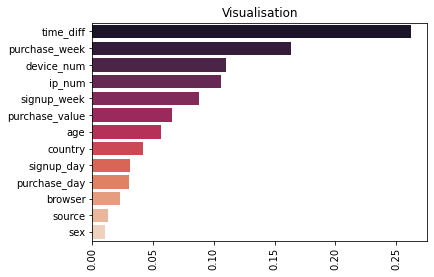

In [67]:
import seaborn as sns; 
sns.barplot(x= feature_imp.values, y= feature_imp.index, palette='rocket')
plt.xticks(rotation='vertical') # mise des noms des personnage en vertical pour une meilleur visibilité 
plt.title('Visualisation')
plt.show()

Afficher le Classification report

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41177
           1       0.99      0.55      0.71      4157

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



Traçer la courbe AUC

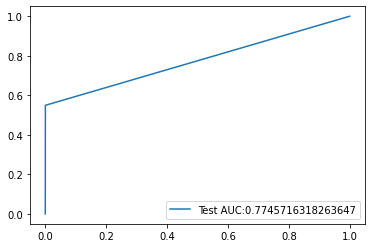

In [58]:
import matplotlib.pyplot as plt
from sklearn import metrics


fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Test AUC:"+str(auc))
plt.legend(loc=4)
plt.show()

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs : Taux de vrais positifs. Taux de faux positifs.

On constate que notre modèles est assez fiables à 77% pour déterminer le taux de vrais positifs , ici les vrais cas de fraudes.

Afficher la matrice de confusion - TP / FP / FN / TN

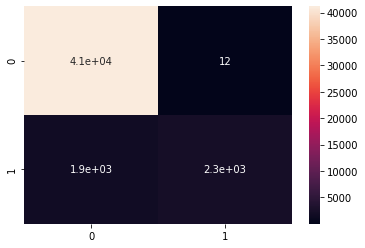

In [61]:
import seaborn as sns; 
mc = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(mc,annot=True)

Il y a beaucoup faux négatif, c'est a dire des cas de fraude prévue négatif par notre algorithme qui sont en réalité des vrais fraudes. Donc on "loupe" beaucoup de fraudeur.
En revanche il y a très peu de faux positif, de cas prévue positif par notre algorithme mais qui ne sont pas des fraudes.


Faire une selection de certaine variables et spliter vos varibales


Entrainer un classifieur LogisticRegression sur ces variables